# week 9 Exercise Feature space

## Ex 1
`Data = 'https://think.cs.vt.edu/corgis/datasets/csv/cars/cars.csv'`
### Download the data

- Programatically download the data from the above link.
- Import the data into a Pandas dataframe.
- Show the head of the Pandas dataframe.

### Feature engineering
- Reduce the dataset by:
  - Make == Honda
  - Fueltype == Gasoline
  - Remove outliers. Hint: `df[column name'] < df['column name'].quantile(0.90)`
  - Only use 2 features: 'Fuel Information.Highway mpg' and 'Engine Information.Engine Statistics.Horsepower'
  - Normalize data (reduce values to be between 0 and 1)
  
### Linear regression

- Perform linear regression where x = horsepower and y = mpg
- What is the coefficient (slope) of your model? What does this number mean?
- According to your model, what is `y` when `x=1`.
- Show the regression line on a scatterplot with the other datapoints.

In [1]:
import csv
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
url = 'https://think.cs.vt.edu/corgis/datasets/csv/cars/cars.csv'

In [3]:
response = requests.get(url)

In [4]:
print(response.headers)

{'Server': 'nginx/1.10.2', 'Date': 'Sun, 17 Oct 2021 17:16:19 GMT', 'Content-Type': 'text/csv; charset=utf-8', 'Content-Length': '87516', 'Connection': 'keep-alive', 'permissions-policy': 'interest-cohort=()', 'Last-Modified': 'Fri, 15 Oct 2021 20:29:18 GMT', 'Access-Control-Allow-Origin': '*', 'Strict-Transport-Security': 'max-age=31556952, max-age=63072000; includeSubdomains', 'ETag': 'W/"6169e49e-131ef4"', 'expires': 'Sun, 17 Oct 2021 17:26:19 GMT', 'Cache-Control': 'max-age=600', 'Content-Encoding': 'gzip', 'x-proxy-cache': 'MISS', 'X-GitHub-Request-Id': '56F6:49C1:54C0B3:84FF54:616C5A63', 'Accept-Ranges': 'bytes', 'Via': '1.1 varnish', 'Age': '0', 'X-Served-By': 'cache-dca17722-DCA', 'X-Cache': 'MISS', 'X-Cache-Hits': '0', 'X-Timer': 'S1634490980.881665,VS0,VE17', 'Vary': 'Accept-Encoding', 'X-Fastly-Request-ID': 'f2fd26cb973ca2e8f058ddb10a94844453056224', 'X-Content-Type-Options': 'nosniff'}


In [5]:
csv_file = open('./data/cars_week_8.csv', 'wb')

In [6]:
csv_file.write(response.content)

1253108

In [7]:
csv_file.close()

In [8]:
file = './data/cars_week_8.csv'

In [9]:
file

'./data/cars_week_8.csv'

In [10]:
%%bash
head ./data/cars_week_8.csv

"Dimensions.Height","Dimensions.Length","Dimensions.Width","Engine Information.Driveline","Engine Information.Engine Type","Engine Information.Hybrid","Engine Information.Number of Forward Gears","Engine Information.Transmission","Fuel Information.City mpg","Fuel Information.Fuel Type","Fuel Information.Highway mpg","Identification.Classification","Identification.ID","Identification.Make","Identification.Model Year","Identification.Year","Engine Information.Engine Statistics.Horsepower","Engine Information.Engine Statistics.Torque"
"140","143","202","All-wheel drive","Audi 3.2L 6 cylinder 250hp 236ft-lbs","True","6","6 Speed Automatic Select Shift","18","Gasoline","25","Automatic transmission","2009 Audi A3 3.2","Audi","2009 Audi A3","2009","250","236"
"140","143","202","Front-wheel drive","Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo","True","6","6 Speed Automatic Select Shift","22","Gasoline","28","Automatic transmission","2009 Audi A3 2.0 T AT","Audi","2009 Audi A3","2009","200","20

In [11]:
dataFrame = pd.read_csv('./data/cars_week_8.csv')

In [12]:
dataFrame

,Dimensions.Height,Dimensions.Length,Dimensions.Width,Engine Information.Driveline,Engine Information.Engine Type,Engine Information.Hybrid,Engine Information.Number of Forward Gears,Engine Information.Transmission,Fuel Information.City mpg,Fuel Information.Fuel Type,Fuel Information.Highway mpg,Identification.Classification,Identification.ID,Identification.Make,Identification.Model Year,Identification.Year,Engine Information.Engine Statistics.Horsepower,Engine Information.Engine Statistics.Torque
0,140,143,202,All-wheel drive,Audi 3.2L 6 cylinder 250hp 236ft-lbs,True,6,6 Speed Automatic Select Shift,18,Gasoline,25,Automatic transmission,2009 Audi A3 3.2,Audi,2009 Audi A3,2009,250,236
1,140,143,202,Front-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,22,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T AT,Audi,2009 Audi A3,2009,200,207
2,140,143,202,Front-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Manual,21,Gasoline,30,Manual transmission,2009 Audi A3 2.0 T,Audi,2009 Audi A3,2009,200,207
3,140,143,202,All-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,21,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T Quattro,Audi,2009 Audi A3,2009,200,207
4,140,143,202,All-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,21,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T Quattro,Audi,2009 Audi A3,2009,200,207
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5071,13,253,201,Front-wheel drive,Honda 3.5L 6 Cylinder 250 hp 253 ft-lbs,True,5,5 Speed Automatic,18,Gasoline,25,Automatic transmission,2012 Honda Pilot EX-L,Honda,2012 Honda Pilot,2012,250,253
5072,141,249,108,All-wheel drive,Lamborghini 5.2L 10 cylinder 552 hp 398 ft-lbs,True,6,6 Speed Manual,12,Gasoline,20,Manual transmission,2012 Lamborghini Gallardo Coupe LP 560-4,Lamborghini,2012 Lamborghini Gallardo Coup,2012,552,398
5073,160,249,108,All-wheel drive,Lamborghini 5.2L 10 cylinder 552 hp 398 ft-lbs,True,6,6 Speed Manual,12,Gasoline,20,Manual transmission,2012 Lamborghini Gallardo LP 560-4 Spyder,Lamborghini,2012 Lamborghini Gallardo Spyder,2012,552,398
5074,200,210,110,Rear-wheel drive,BMW 3.0L 6 cylinder 315hp 330 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,17,Gasoline,25,Automatic transmission,2012 BMW 740i Sedan,BMW,2012 BMW 7 Series,2012,315,330


In [13]:
dataFrame.head()

,Dimensions.Height,Dimensions.Length,Dimensions.Width,Engine Information.Driveline,Engine Information.Engine Type,Engine Information.Hybrid,Engine Information.Number of Forward Gears,Engine Information.Transmission,Fuel Information.City mpg,Fuel Information.Fuel Type,Fuel Information.Highway mpg,Identification.Classification,Identification.ID,Identification.Make,Identification.Model Year,Identification.Year,Engine Information.Engine Statistics.Horsepower,Engine Information.Engine Statistics.Torque
0,140,143,202,All-wheel drive,Audi 3.2L 6 cylinder 250hp 236ft-lbs,True,6,6 Speed Automatic Select Shift,18,Gasoline,25,Automatic transmission,2009 Audi A3 3.2,Audi,2009 Audi A3,2009,250,236
1,140,143,202,Front-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,22,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T AT,Audi,2009 Audi A3,2009,200,207
2,140,143,202,Front-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Manual,21,Gasoline,30,Manual transmission,2009 Audi A3 2.0 T,Audi,2009 Audi A3,2009,200,207
3,140,143,202,All-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,21,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T Quattro,Audi,2009 Audi A3,2009,200,207
4,140,143,202,All-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,21,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T Quattro,Audi,2009 Audi A3,2009,200,207


In [14]:
with open('./data/cars_week_8.csv', newline='') as f:
    reader = csv.reader(f)
    data = list(reader)

print(data)

[['Dimensions.Height', 'Dimensions.Length', 'Dimensions.Width', 'Engine Information.Driveline', 'Engine Information.Engine Type', 'Engine Information.Hybrid', 'Engine Information.Number of Forward Gears', 'Engine Information.Transmission', 'Fuel Information.City mpg', 'Fuel Information.Fuel Type', 'Fuel Information.Highway mpg', 'Identification.Classification', 'Identification.ID', 'Identification.Make', 'Identification.Model Year', 'Identification.Year', 'Engine Information.Engine Statistics.Horsepower', 'Engine Information.Engine Statistics.Torque'], ['140', '143', '202', 'All-wheel drive', 'Audi 3.2L 6 cylinder 250hp 236ft-lbs', 'True', '6', '6 Speed Automatic Select Shift', '18', 'Gasoline', '25', 'Automatic transmission', '2009 Audi A3 3.2', 'Audi', '2009 Audi A3', '2009', '250', '236'], ['140', '143', '202', 'Front-wheel drive', 'Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo', 'True', '6', '6 Speed Automatic Select Shift', '22', 'Gasoline', '28', 'Automatic transmission', '2009 Au

In [15]:
df = pd.DataFrame(data[1:], columns=["Height", "Length", "Width", "Driveline", "Engine Type", "Hybrid", "Number of Forward Gears", "Transmission", "City mpg", "Fuel Type", "Highway mpg", "Classification", "ID", "Make", "Model Year", "Year", "Horsepower", "Torque"])
df.to_csv('./data/cars_week_8_2.csv', index=False)

In [16]:
df

,Height,Length,Width,Driveline,Engine Type,Hybrid,Number of Forward Gears,Transmission,City mpg,Fuel Type,Highway mpg,Classification,ID,Make,Model Year,Year,Horsepower,Torque
0,140,143,202,All-wheel drive,Audi 3.2L 6 cylinder 250hp 236ft-lbs,True,6,6 Speed Automatic Select Shift,18,Gasoline,25,Automatic transmission,2009 Audi A3 3.2,Audi,2009 Audi A3,2009,250,236
1,140,143,202,Front-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,22,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T AT,Audi,2009 Audi A3,2009,200,207
2,140,143,202,Front-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Manual,21,Gasoline,30,Manual transmission,2009 Audi A3 2.0 T,Audi,2009 Audi A3,2009,200,207
3,140,143,202,All-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,21,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T Quattro,Audi,2009 Audi A3,2009,200,207
4,140,143,202,All-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,21,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T Quattro,Audi,2009 Audi A3,2009,200,207
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5071,13,253,201,Front-wheel drive,Honda 3.5L 6 Cylinder 250 hp 253 ft-lbs,True,5,5 Speed Automatic,18,Gasoline,25,Automatic transmission,2012 Honda Pilot EX-L,Honda,2012 Honda Pilot,2012,250,253
5072,141,249,108,All-wheel drive,Lamborghini 5.2L 10 cylinder 552 hp 398 ft-lbs,True,6,6 Speed Manual,12,Gasoline,20,Manual transmission,2012 Lamborghini Gallardo Coupe LP 560-4,Lamborghini,2012 Lamborghini Gallardo Coup,2012,552,398
5073,160,249,108,All-wheel drive,Lamborghini 5.2L 10 cylinder 552 hp 398 ft-lbs,True,6,6 Speed Manual,12,Gasoline,20,Manual transmission,2012 Lamborghini Gallardo LP 560-4 Spyder,Lamborghini,2012 Lamborghini Gallardo Spyder,2012,552,398
5074,200,210,110,Rear-wheel drive,BMW 3.0L 6 cylinder 315hp 330 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,17,Gasoline,25,Automatic transmission,2012 BMW 740i Sedan,BMW,2012 BMW 7 Series,2012,315,330


In [17]:
df.head()

,Height,Length,Width,Driveline,Engine Type,Hybrid,Number of Forward Gears,Transmission,City mpg,Fuel Type,Highway mpg,Classification,ID,Make,Model Year,Year,Horsepower,Torque
0,140,143,202,All-wheel drive,Audi 3.2L 6 cylinder 250hp 236ft-lbs,True,6,6 Speed Automatic Select Shift,18,Gasoline,25,Automatic transmission,2009 Audi A3 3.2,Audi,2009 Audi A3,2009,250,236
1,140,143,202,Front-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,22,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T AT,Audi,2009 Audi A3,2009,200,207
2,140,143,202,Front-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Manual,21,Gasoline,30,Manual transmission,2009 Audi A3 2.0 T,Audi,2009 Audi A3,2009,200,207
3,140,143,202,All-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,21,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T Quattro,Audi,2009 Audi A3,2009,200,207
4,140,143,202,All-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,21,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T Quattro,Audi,2009 Audi A3,2009,200,207


In [18]:
first_line_in_dataset = df.loc[(df['Make'] == 'Honda') & (df['Fuel Type'] == 'Gasoline')].iloc[0][:]

In [19]:
first_line_in_dataset

Height                                                        152
Length                                                        240
Width                                                          57
Driveline                                       Front-wheel drive
Engine Type                Honda 3.5L 6 Cylinder 271hp 251 ft-lbs
Hybrid                                                       True
Number of Forward Gears                                         6
Transmission                                       6 Speed Manual
City mpg                                                       17
Fuel Type                                                Gasoline
Highway mpg                                                    25
Classification                                Manual transmission
ID                                2010 Honda Accord EX-L V-6 Coup
Make                                                        Honda
Model Year                                2010 Honda Accord Coupe
Year      

In [20]:
dataSet = (df.loc[(df['Make'] == 'Honda') & (df['Fuel Type'] == 'Gasoline') & (df['Highway mpg'].astype(float) < df['Highway mpg'].astype(float).quantile(0.90)) & (df['Horsepower'].astype(float) < df['Horsepower'].astype(float).quantile(0.90))]).reset_index()

In [21]:
dataSet

,index,Height,Length,Width,Driveline,Engine Type,Hybrid,Number of Forward Gears,Transmission,City mpg,Fuel Type,Highway mpg,Classification,ID,Make,Model Year,Year,Horsepower,Torque
0,101,152,240,57,Front-wheel drive,Honda 3.5L 6 Cylinder 271hp 251 ft-lbs,True,6,6 Speed Manual,17,Gasoline,25,Manual transmission,2010 Honda Accord EX-L V-6 Coup,Honda,2010 Honda Accord Coupe,2010,271,251
1,102,152,240,57,Front-wheel drive,Honda 2.4L 4 cylinder 190 hp 162 ft-lbs,True,5,5 Speed Automatic,21,Gasoline,31,Automatic transmission,2010 Honda Accord EX Coup AT,Honda,2010 Honda Accord Coupe,2010,190,162
2,103,152,240,57,Front-wheel drive,Honda 2.4L 4 cylinder 190 hp 162 ft-lbs,True,5,5 Speed Manual,22,Gasoline,31,Manual transmission,2010 Honda Accord EX-L Coup,Honda,2010 Honda Accord Coupe,2010,190,162
3,104,152,240,57,Front-wheel drive,Honda 2.4L 4 cylinder 190 hp 162 ft-lbs,True,5,5 Speed Automatic,21,Gasoline,31,Automatic transmission,2010 Honda Accord EX-L Coup AT,Honda,2010 Honda Accord Coupe,2010,190,162
4,105,152,240,57,Front-wheel drive,Honda 3.5L 6 Cylinder 271hp 251 ft-lbs,True,5,5 Speed Automatic,19,Gasoline,28,Automatic transmission,2010 Honda Accord EX-L V-6 Coup AT,Honda,2010 Honda Accord Coupe,2010,271,251
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,5067,3,253,201,Front-wheel drive,Honda 3.5L 6 Cylinder 250 hp 253 ft-lbs,True,5,5 Speed Automatic,18,Gasoline,25,Automatic transmission,2012 Honda Pilot LX,Honda,2012 Honda Pilot,2012,250,253
102,5068,3,253,201,Four-wheel drive,Honda 3.5L 6 Cylinder 250 hp 253 ft-lbs,True,5,5 Speed Automatic,17,Gasoline,24,Automatic transmission,2012 Honda Pilot LX 4WD,Honda,2012 Honda Pilot,2012,250,253
103,5069,3,253,201,Front-wheel drive,Honda 3.5L 6 Cylinder 250 hp 253 ft-lbs,True,5,5 Speed Automatic,18,Gasoline,25,Automatic transmission,2012 Honda Pilot EX,Honda,2012 Honda Pilot,2012,250,253
104,5070,3,253,201,Four-wheel drive,Honda 3.5L 6 Cylinder 250 hp 253 ft-lbs,True,5,5 Speed Automatic,17,Gasoline,24,Automatic transmission,2012 Honda Pilot EX 4WD,Honda,2012 Honda Pilot,2012,250,253


In [22]:
import sklearn

In [23]:
import sklearn.linear_model

In [24]:
import seaborn as sb

In [25]:
custom_dataSet_1 = dataSet[["Highway mpg", "Horsepower"]]

In [26]:
custom_dataSet_1

,Highway mpg,Horsepower
0,25,271
1,31,190
2,31,190
3,31,190
4,28,271
...,...,...
101,25,250
102,24,250
103,25,250
104,24,250


In [27]:
from sklearn import preprocessing

In [28]:
scaler = preprocessing.MinMaxScaler()
names = custom_dataSet_1.columns
d = scaler.fit_transform(custom_dataSet_1)
scaled_df = pd.DataFrame(d, columns=names)
scaled_df.head()

,Highway mpg,Horsepower
0,0.454545,1.000000
1,1.000000,0.228571
2,1.000000,0.228571
3,1.000000,0.228571
4,0.727273,1.000000


In [29]:
scaled_df

,Highway mpg,Horsepower
0,0.454545,1.000000
1,1.000000,0.228571
2,1.000000,0.228571
3,1.000000,0.228571
4,0.727273,1.000000
...,...,...
101,0.454545,0.800000
102,0.363636,0.800000
103,0.454545,0.800000
104,0.363636,0.800000


<IPython.core.display.Javascript object>


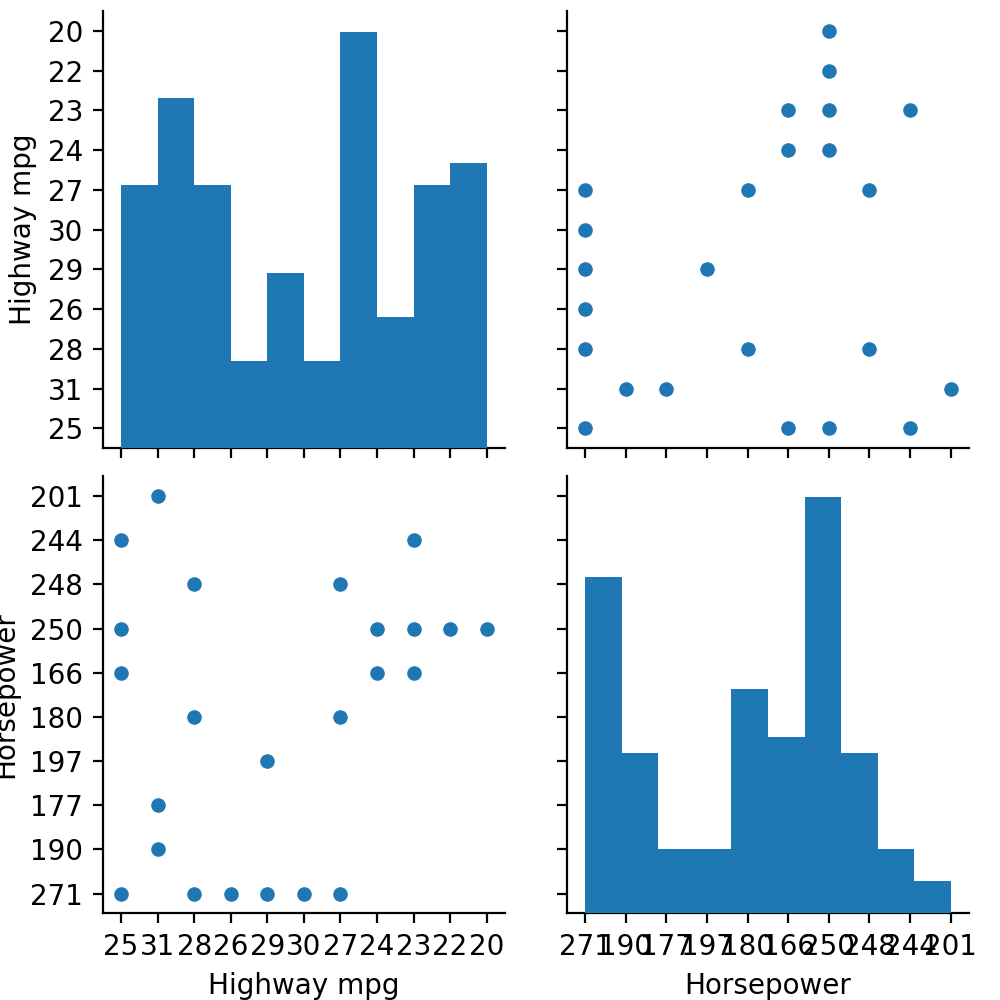

In [30]:
sb.pairplot(custom_dataSet_1)

In [31]:
custom_dataSet_2 = dataSet[["Highway mpg", "City mpg"]]

In [32]:
custom_dataSet_2

,Highway mpg,City mpg
0,25,17
1,31,21
2,31,22
3,31,21
4,28,19
...,...,...
101,25,18
102,24,17
103,25,18
104,24,17


<IPython.core.display.Javascript object>


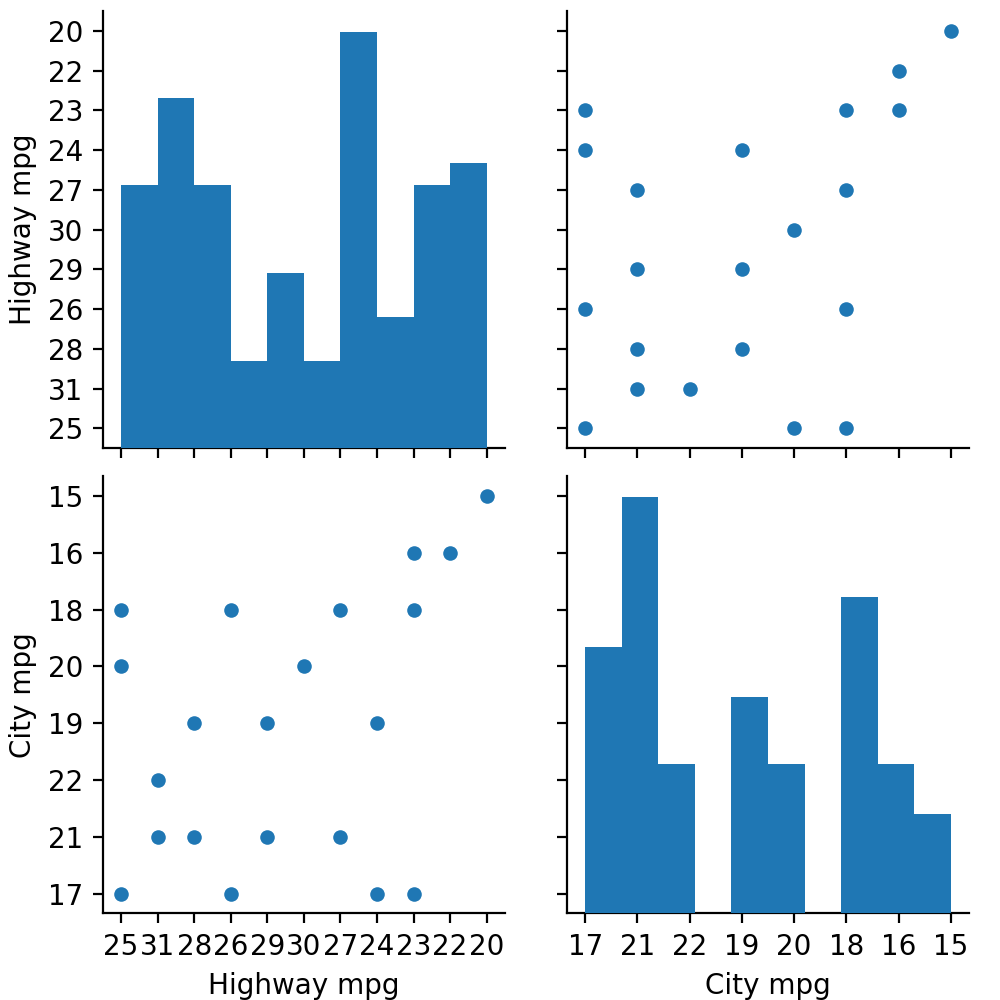

In [33]:
sb.pairplot(custom_dataSet_2)

In [34]:
custom_dataSet_2.reset_index()

,index,Highway mpg,City mpg
0,0,25,17
1,1,31,21
2,2,31,22
3,3,31,21
4,4,28,19
...,...,...,...
101,101,25,18
102,102,24,17
103,103,25,18
104,104,24,17


In [35]:
highway_mpg = custom_dataSet_2['Highway mpg']

In [36]:
highway_mpg

0      25
1      31
2      31
3      31
4      28
       ..
101    25
102    24
103    25
104    24
105    25
Name: Highway mpg, Length: 106, dtype: object

In [37]:
city_mpg = custom_dataSet_2['City mpg']

In [38]:
city_mpg

0      17
1      21
2      22
3      21
4      19
       ..
101    18
102    17
103    18
104    17
105    18
Name: City mpg, Length: 106, dtype: object

<IPython.core.display.Javascript object>


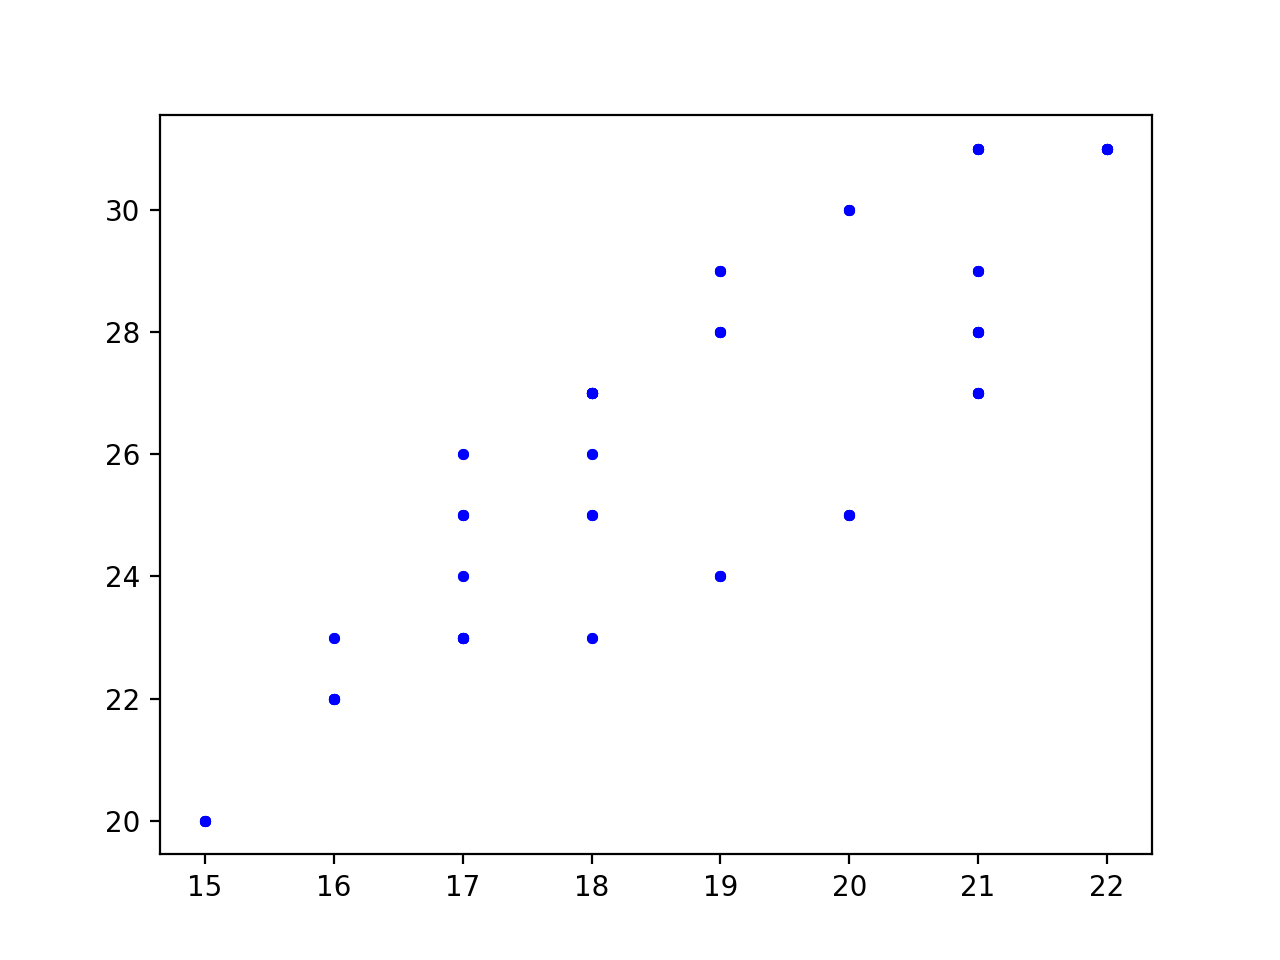

In [56]:
plt.figure()
plt.plot(custom_dataSet_2['City mpg'].astype(int), custom_dataSet_2['Highway mpg'].astype(int), 'b.')

<IPython.core.display.Javascript object>


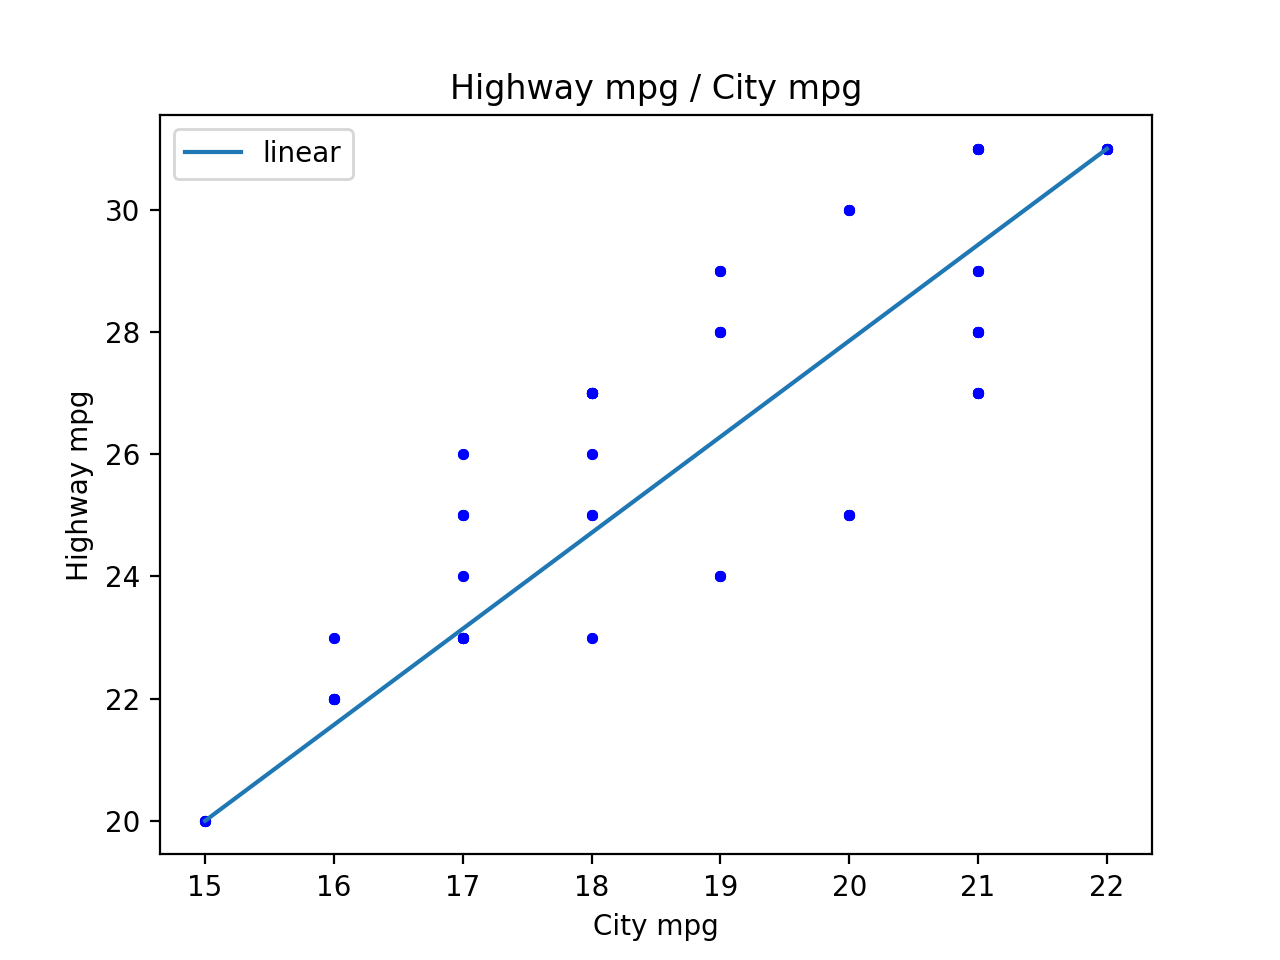

In [61]:
plt.figure()
plt.plot(custom_dataSet_2['City mpg'].astype(int), custom_dataSet_2['Highway mpg'].astype(int), 'b.')
plt.plot([15, 22], [20, 31], label='linear')
plt.title('Highway mpg / City mpg')
plt.xlabel('City mpg')
plt.ylabel('Highway mpg')
plt.legend()

In [62]:
import sklearn.linear_model

In [63]:
xs = custom_dataSet_2['City mpg'].astype(int)
ys = custom_dataSet_2['Highway mpg'].astype(int)

In [64]:
xs_reshape = np.array(xs).reshape(-1, 1)
print(xs.shape)
print(xs_reshape.shape)
print(xs_reshape)

(106,)
(106, 1)
[[17]
 [21]
 [22]
 [21]
 [19]
 [22]
 [21]
 [22]
 [17]
 [19]
 [22]
 [21]
 [22]
 [21]
 [22]
 [21]
 [22]
 [21]
 [19]
 [19]
 [20]
 [20]
 [18]
 [18]
 [18]
 [18]
 [18]
 [17]
 [21]
 [21]
 [21]
 [21]
 [21]
 [21]
 [21]
 [21]
 [21]
 [21]
 [21]
 [21]
 [21]
 [21]
 [21]
 [21]
 [21]
 [21]
 [20]
 [19]
 [20]
 [19]
 [20]
 [19]
 [20]
 [18]
 [19]
 [18]
 [20]
 [17]
 [16]
 [17]
 [16]
 [17]
 [16]
 [17]
 [16]
 [17]
 [16]
 [17]
 [17]
 [16]
 [17]
 [16]
 [18]
 [18]
 [18]
 [19]
 [19]
 [16]
 [16]
 [17]
 [17]
 [15]
 [15]
 [15]
 [15]
 [15]
 [15]
 [20]
 [20]
 [17]
 [19]
 [22]
 [22]
 [18]
 [18]
 [18]
 [18]
 [18]
 [19]
 [18]
 [19]
 [18]
 [17]
 [18]
 [17]
 [18]]


In [65]:
model = sklearn.linear_model.LinearRegression()
model.fit(xs_reshape, ys)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [66]:
model.coef_

array([1.32910379])

For hver city mph, stiger Highway mpg med 1.3

In [68]:
model.intercept_

1.315572042829455

In [69]:
predicted = model.predict(xs_reshape)
spending1 = model.predict([[1]])
print('Spending 1 on Highway mpg means {} will be the City mpg'.format(spending1[0]))
predicted

Spending 1 on Highway mpg means 2.64467582834501 will be the City mpg


array([23.9103364 , 29.22675154, 30.55585532, 29.22675154, 26.56854397,
       30.55585532, 29.22675154, 30.55585532, 23.9103364 , 26.56854397,
       30.55585532, 29.22675154, 30.55585532, 29.22675154, 30.55585532,
       29.22675154, 30.55585532, 29.22675154, 26.56854397, 26.56854397,
       27.89764775, 27.89764775, 25.23944018, 25.23944018, 25.23944018,
       25.23944018, 25.23944018, 23.9103364 , 29.22675154, 29.22675154,
       29.22675154, 29.22675154, 29.22675154, 29.22675154, 29.22675154,
       29.22675154, 29.22675154, 29.22675154, 29.22675154, 29.22675154,
       29.22675154, 29.22675154, 29.22675154, 29.22675154, 29.22675154,
       29.22675154, 27.89764775, 26.56854397, 27.89764775, 26.56854397,
       27.89764775, 26.56854397, 27.89764775, 25.23944018, 26.56854397,
       25.23944018, 27.89764775, 23.9103364 , 22.58123261, 23.9103364 ,
       22.58123261, 23.9103364 , 22.58123261, 23.9103364 , 22.58123261,
       23.9103364 , 22.58123261, 23.9103364 , 23.9103364 , 22.58

In [70]:
predicted = model.predict(xs_reshape)
spending1000 = model.predict([[1000]])
print('Spending 1000 on Highway mpg means {} will be the City mpg'.format(spending1000[0]))
predicted

Spending 1000 on Highway mpg means 1330.419357558384 will be the City mpg


array([23.9103364 , 29.22675154, 30.55585532, 29.22675154, 26.56854397,
       30.55585532, 29.22675154, 30.55585532, 23.9103364 , 26.56854397,
       30.55585532, 29.22675154, 30.55585532, 29.22675154, 30.55585532,
       29.22675154, 30.55585532, 29.22675154, 26.56854397, 26.56854397,
       27.89764775, 27.89764775, 25.23944018, 25.23944018, 25.23944018,
       25.23944018, 25.23944018, 23.9103364 , 29.22675154, 29.22675154,
       29.22675154, 29.22675154, 29.22675154, 29.22675154, 29.22675154,
       29.22675154, 29.22675154, 29.22675154, 29.22675154, 29.22675154,
       29.22675154, 29.22675154, 29.22675154, 29.22675154, 29.22675154,
       29.22675154, 27.89764775, 26.56854397, 27.89764775, 26.56854397,
       27.89764775, 26.56854397, 27.89764775, 25.23944018, 26.56854397,
       25.23944018, 27.89764775, 23.9103364 , 22.58123261, 23.9103364 ,
       22.58123261, 23.9103364 , 22.58123261, 23.9103364 , 22.58123261,
       23.9103364 , 22.58123261, 23.9103364 , 23.9103364 , 22.58

In [71]:
predicted = model.predict(xs_reshape)
spending500 = model.predict([[500]])
print('Spending 500 on Highway mpg means {} will be the City mpg'.format(spending500[0]))
predicted

Spending 500 on Highway mpg means 665.8674648006067 will be the City mpg


array([23.9103364 , 29.22675154, 30.55585532, 29.22675154, 26.56854397,
       30.55585532, 29.22675154, 30.55585532, 23.9103364 , 26.56854397,
       30.55585532, 29.22675154, 30.55585532, 29.22675154, 30.55585532,
       29.22675154, 30.55585532, 29.22675154, 26.56854397, 26.56854397,
       27.89764775, 27.89764775, 25.23944018, 25.23944018, 25.23944018,
       25.23944018, 25.23944018, 23.9103364 , 29.22675154, 29.22675154,
       29.22675154, 29.22675154, 29.22675154, 29.22675154, 29.22675154,
       29.22675154, 29.22675154, 29.22675154, 29.22675154, 29.22675154,
       29.22675154, 29.22675154, 29.22675154, 29.22675154, 29.22675154,
       29.22675154, 27.89764775, 26.56854397, 27.89764775, 26.56854397,
       27.89764775, 26.56854397, 27.89764775, 25.23944018, 26.56854397,
       25.23944018, 27.89764775, 23.9103364 , 22.58123261, 23.9103364 ,
       22.58123261, 23.9103364 , 22.58123261, 23.9103364 , 22.58123261,
       23.9103364 , 22.58123261, 23.9103364 , 23.9103364 , 22.58